In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
import requests
requests.__version__

'2.22.0'

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Import the requests library.
import requests

# Import the API key.
from Config import weather_api_key

In [24]:


# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs



In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [28]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval       ')
print('-------------------------------')

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({'City': city.title(),
                         'Lat': city_lat,
                         'Lng': city_lng,
                         'Max Temp': city_max_temp,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Country': city_country,
                         'Date': city_date})
        
# If an error is experienced, skip the city.
    except:
        print('City not found. Skipping...')
        pass

# Indicate that Dat Loading is complete.
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | fairbanks
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | flinders
Processing Record 6 of Set 1 | wanning
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | xining
Processing Record 12 of Set 1 | shalyhyne
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | sao jose da coroa grande
Processing Record 17 of Set 1 | holbeach
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | ust-kut
Processing Record 20 of Set 1 | balkanabat
Processing Record 21 of Set 1 | tshela
Processing Record 22 of Set 1 | y

Processing Record 40 of Set 4 | north bend
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | santana do ipanema
Processing Record 43 of Set 4 | lasa
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | puerto baquerizo moreno
Processing Record 46 of Set 4 | opuwo
Processing Record 47 of Set 4 | qandala
Processing Record 48 of Set 4 | the valley
Processing Record 49 of Set 4 | grand gaube
Processing Record 50 of Set 4 | skibbereen
Processing Record 1 of Set 5 | nioaque
Processing Record 2 of Set 5 | tuatapere
Processing Record 3 of Set 5 | parfenyevo
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | harper
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | birao
Processing Record 9 of Set 5 | langholm
Processing Record 10 of Set 5 | valverde del camino
Processing Record 11 of Set 5 | te anau
Processing Record 12 of Set 5 | port elizabe

City not found. Skipping...
Processing Record 35 of Set 8 | homer
Processing Record 36 of Set 8 | lensk
Processing Record 37 of Set 8 | gat
Processing Record 38 of Set 8 | les escoumins
Processing Record 39 of Set 8 | babol
Processing Record 40 of Set 8 | shingu
Processing Record 41 of Set 8 | boa vista
Processing Record 42 of Set 8 | carauari
Processing Record 43 of Set 8 | krasnoarmeysk
Processing Record 44 of Set 8 | ostrovnoy
Processing Record 45 of Set 8 | red bluff
Processing Record 46 of Set 8 | katsuura
Processing Record 47 of Set 8 | andenes
Processing Record 48 of Set 8 | provadija
City not found. Skipping...
Processing Record 49 of Set 8 | hovd
Processing Record 50 of Set 8 | dingle
Processing Record 1 of Set 9 | krasnoselkup
Processing Record 2 of Set 9 | rocha
Processing Record 3 of Set 9 | eldorado
Processing Record 4 of Set 9 | darhan
Processing Record 5 of Set 9 | beringovskiy
Processing Record 6 of Set 9 | jiddah
City not found. Skipping...
Processing Record 7 of Set 9

City not found. Skipping...
Processing Record 28 of Set 12 | mugur-aksy
Processing Record 29 of Set 12 | zhezkazgan
Processing Record 30 of Set 12 | saint-francois
Processing Record 31 of Set 12 | nelson bay
Processing Record 32 of Set 12 | marshfield
Processing Record 33 of Set 12 | nizwa
Processing Record 34 of Set 12 | chavakkad
Processing Record 35 of Set 12 | asfi
Processing Record 36 of Set 12 | wenchi
Processing Record 37 of Set 12 | pleshanovo
Processing Record 38 of Set 12 | wainwright
Processing Record 39 of Set 12 | san cristobal
Processing Record 40 of Set 12 | ballina
Processing Record 41 of Set 12 | otavi
Processing Record 42 of Set 12 | sorong
Processing Record 43 of Set 12 | beloha
Processing Record 44 of Set 12 | qasigiannguit
Processing Record 45 of Set 12 | takoradi
Processing Record 46 of Set 12 | santiago del estero
Processing Record 47 of Set 12 | alto araguaia
Processing Record 48 of Set 12 | mutoko
Processing Record 49 of Set 12 | aginskoye
Processing Record 50 

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pisco,-13.70,-76.22,63.00,88,32,14.00,PE,2020-08-25 22:49:20
1,Iqaluit,63.75,-68.51,42.62,76,82,5.64,CA,2020-08-25 22:53:39
2,Fairbanks,64.84,-147.72,60.01,89,100,3.00,US,2020-08-25 22:52:53
3,Puerto Ayora,-0.74,-90.35,68.00,86,67,5.01,EC,2020-08-25 22:53:39
4,Flinders,-34.58,150.86,55.99,86,0,1.01,AU,2020-08-25 22:53:39
5,Wanning,18.80,110.40,82.02,80,47,13.06,CN,2020-08-25 22:53:39
6,Tasiilaq,65.61,-37.64,39.20,86,0,5.82,GL,2020-08-25 22:53:39
7,Cape Town,-33.93,18.42,57.99,91,75,3.00,ZA,2020-08-25 22:53:39
8,Cidreira,-30.18,-50.21,62.58,83,20,25.14,BR,2020-08-25 22:53:39
9,Xining,36.62,101.77,53.13,51,0,2.91,CN,2020-08-25 22:53:39


In [34]:
# Create the output file (CSV).
#output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [39]:


# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today



1598396234.1154885

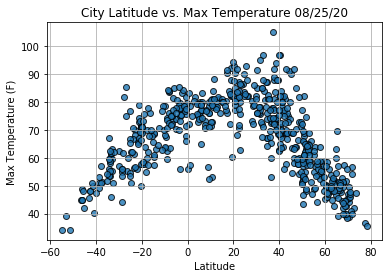

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

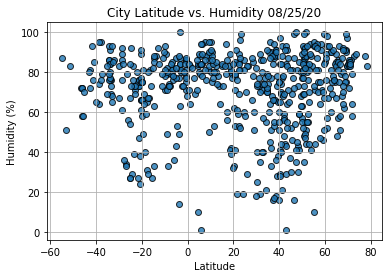

In [41]:


# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()



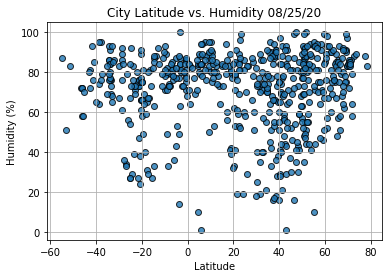

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

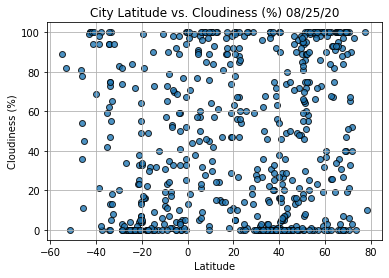

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

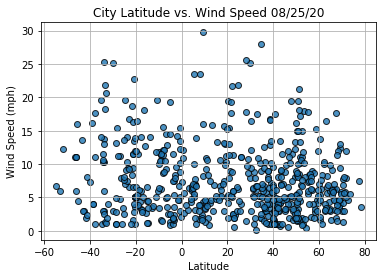

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Iqaluit,63.75,-68.51,42.62,76,82,5.64,CA,2020-08-25 22:53:39
2,Fairbanks,64.84,-147.72,60.01,89,100,3.00,US,2020-08-25 22:52:53
5,Wanning,18.80,110.40,82.02,80,47,13.06,CN,2020-08-25 22:53:39
6,Tasiilaq,65.61,-37.64,39.20,86,0,5.82,GL,2020-08-25 22:53:39
9,Xining,36.62,101.77,53.13,51,0,2.91,CN,2020-08-25 22:53:39
...,...,...,...,...,...,...,...,...,...
573,Lovozero,68.00,35.01,43.66,73,0,3.87,RU,2020-08-25 22:53:57
576,Belyy Yar,53.60,91.39,57.29,89,100,10.20,RU,2020-08-25 22:53:57
577,Chitral,35.85,71.79,77.29,45,97,3.51,PK,2020-08-25 22:53:57
578,Cotonou,6.37,2.42,74.26,89,32,6.67,BJ,2020-08-25 22:53:57


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

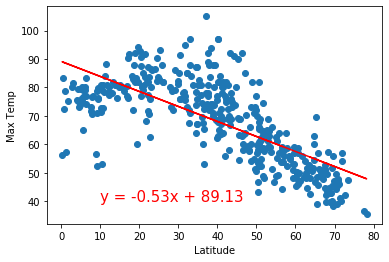

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere /n for Maximum Temperature', 'Max Temp',(10,40))

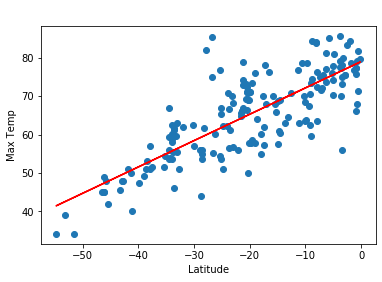

In [60]:


# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))



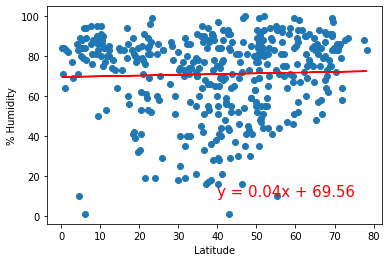

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

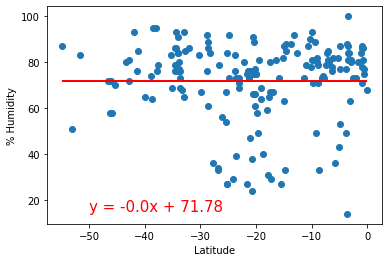

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

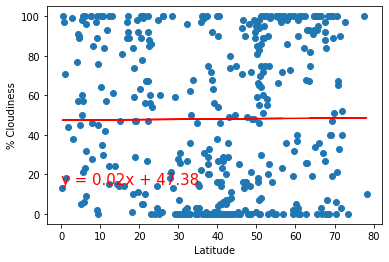

In [64]:


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,15))



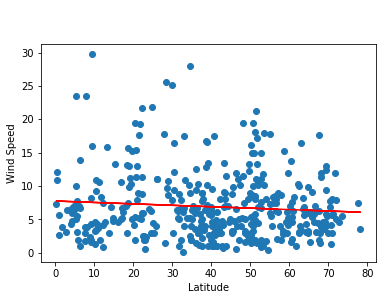

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

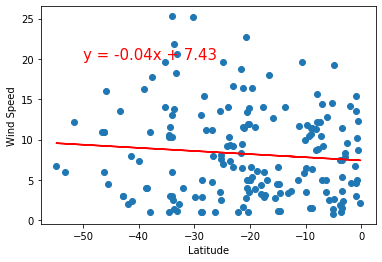

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))